# LB 259
## Teil 4

In [1]:
import pandas as pd
import os 

weather_df = pd.read_csv(os.path.join('dataset-weather2.csv'))
weather_df.head()

,Datum,Niederschlag in mm,Niederschlag in mm am Vortag,Niederschlag in mm am nächsten Tag
0,1/2/1948,14.986,11.938,10.668
1,1/3/1948,10.668,14.986,7.874
2,1/4/1948,7.874,10.668,4.318
3,1/5/1948,4.318,7.874,11.176
4,1/6/1948,11.176,4.318,10.414


In [2]:
# Ich füge nun Code aus dem Teil 3 der LB ein, um entsprechende Messmetriken zu berechnen

import datetime as dt

weather_df['Datum'] = pd.to_datetime(weather_df['Datum'])
weather_df['Datum']= weather_df['Datum'].map(dt.datetime.toordinal)

features = ['Datum', 'Niederschlag in mm', 'Niederschlag in mm am Vortag']
target = ['Niederschlag in mm am nächsten Tag']

X = weather_df[features]
y = weather_df[target]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

len(X_train), len(X_test)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 4.1
Ich vermute, dass die Felder etwa eine gleich grosse Aussagekraft enthalten. Dies denke ich, weil es sich um die gleichen Daten handelt, jedoch jeweils um einen Tag verschoben.

Dennoch erstelle ich hierzu erstelle ich eine Korrelationsanalyse.

<Axes: >

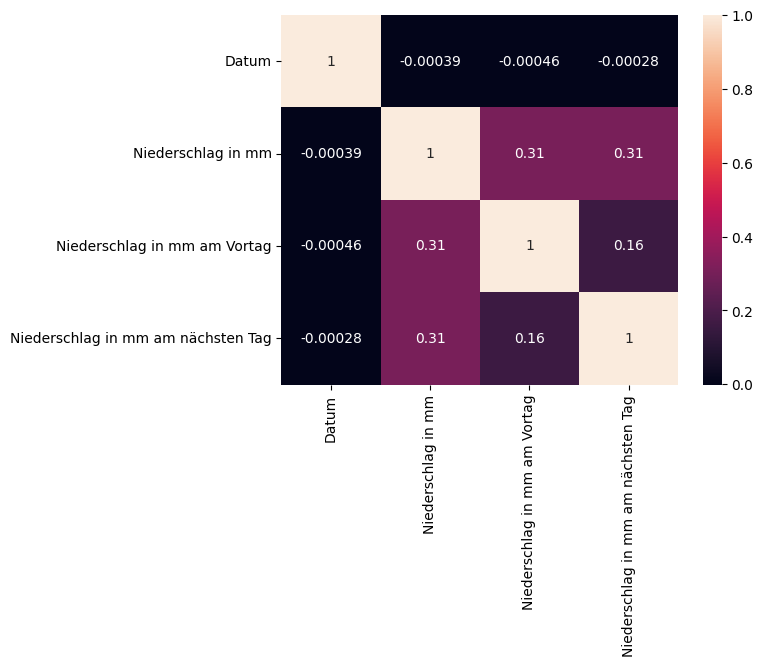

In [3]:
import seaborn as sns

corr_matrix = weather_df.corr()
sns.heatmap(corr_matrix, annot=True)

Durch das obige Diagramm wird klar: Mit einem Höchstwert von 0.31 ist das Feld "Niederschlag in mm" besonders aussagekräftig.

Ausserdem finde ich es erstaunlich, dass die Spalte "Niederschlag in mm" fast doppelt so aussagekräftig ist, wie die Spalte "Niederschlag in mm am Vortag", obwohl es sich ja eigentlich um die selben Daten handelt.

# 4.2
Hierzu berechne ich den MSE (mean squared error) und den R2-Score.

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print('R2-Score:', r2)

Mean Squared Error:  31.772882193046264
R2-Score: 0.10450760371388035


# 4.3
Da ich Lineare Regression als Algorithmus verwerwendet habe, kann ich keine Wahrheitsmatrix erstellen. 

Die Lineare Regression ist eine Methode, um eine Vorhersage zu treffen, wie eine abhängige Variable sich verändert, wenn eine oder mehrere unabhängige Variablen geändert werden. Eine Wahrheitsmatrix hingegen ist ein Konzept aus der Logik, das verwendet wird, um die Auswirkungen von verschiedenen Kombinationen von wahren und falschen Aussagen zu untersuchen.

> Quelle zum obigen Text: *https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score*

Das bedeutet, dass eine Wahrheitsmatrix nicht erstellbar ist, um die Ergebnisse einer linearen Regression zu untersuchen, da sie verschiedene Konzepte behandeln. 

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Konvertierung von y_pred in binäre Klassenvorhersagen
y_pred_class = np.where(y_pred >= 0.5, 1, 0)

# Konvertierung von y_test in binäre Klassen
y_test_class = np.where(y_test.values >= 0.5, 1, 0)

conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Berechnung der TP, TN, FP und FN
tn = conf_matrix[0][0]
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]

# Berechnung der Sensitivität
sensitivity = tp / (tp + fn)
spec = tn / (tn + fp)

print('Spezifität:', spec)
print("Sensitivität:", sensitivity)


Spezifität: 0.0
Sensitivität: 1.0


# 4.4
Das Modell hat einen MSE-Wert von 31.77 und einen R2-Wert von 0.10. Dies deutet darauf hin, dass das Modell nicht besonders gut funktioniert und nur einen geringen Teil der Variation in den Daten erklären kann. Ausserdem habe ich einen Spezifität-Wert von 0.0 und einen Sensitivität-Wert von 1.0, was ebenfalls darauf hinweist, dass ich einen falschen Algorithmus gewählt habe.

Mögliche Gründe für die schlechte Performance könnten 

   - fehlende wichtige Features (wie Temperatur, Luftfeuchtigkeit, etc.)

   - nicht-lineare Zusammenhänge 

   - unzureichende Datenmenge oder
   
   - Auswählen eines falschen Algorithmus 

sein. 

Mögliche Verbesserungsvorschläge wären, das Modell weiter zu verbessern, indem man neue Features hinzufügt, die Datenmenge erhöht oder einen anderen Algorithmus verwendet.